# Visualising Meshes

This notebook is to visualise the 3D meshes in the ShapeNetSem Dataset and interact with them

In [1]:
import glob
import random
import trimesh
from IPython.display import display

In [11]:
def get_random_mesh(folder_path="../Data/ShapeNetSem/Files/models-OBJ/models", extension="obj"):
    folder_path = "../Data/ShapeNetSem/Files/models-OBJ/models"
    extension = "obj"  # Change this to your desired file extension

    # Create a search pattern and get all matching file paths
    pattern = f"{folder_path}/*.{extension}"
    file_paths = glob.glob(pattern)

    if file_paths:
        random_file_path = random.choice(file_paths)
        print("Random file path:", random_file_path)
    else:
        print(f"No files found with the .{extension} extension in {folder_path}.")
    
    mesh = trimesh.load_mesh(random_file_path)
    return mesh

In [14]:
import trimesh
from IPython.display import display

# Load your mesh file (replace with the actual path to your .obj file)
mesh = get_random_mesh()

# Show the mesh in an interactive viewer
mesh.show()

Random file path: ../Data/ShapeNetSem/Files/models-OBJ/models/3e1be313618251d6bbed0fb2b80f6c79.obj


In [15]:
path = "../Data/ShapeNetSem/Files/models-OBJ/models/3e1be313618251d6bbed0fb2b80f6c79.obj"

In [16]:
import pyvista as pv

/Users/rishabhrao/Documents/VSCode/multimodal-3d-gen/env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


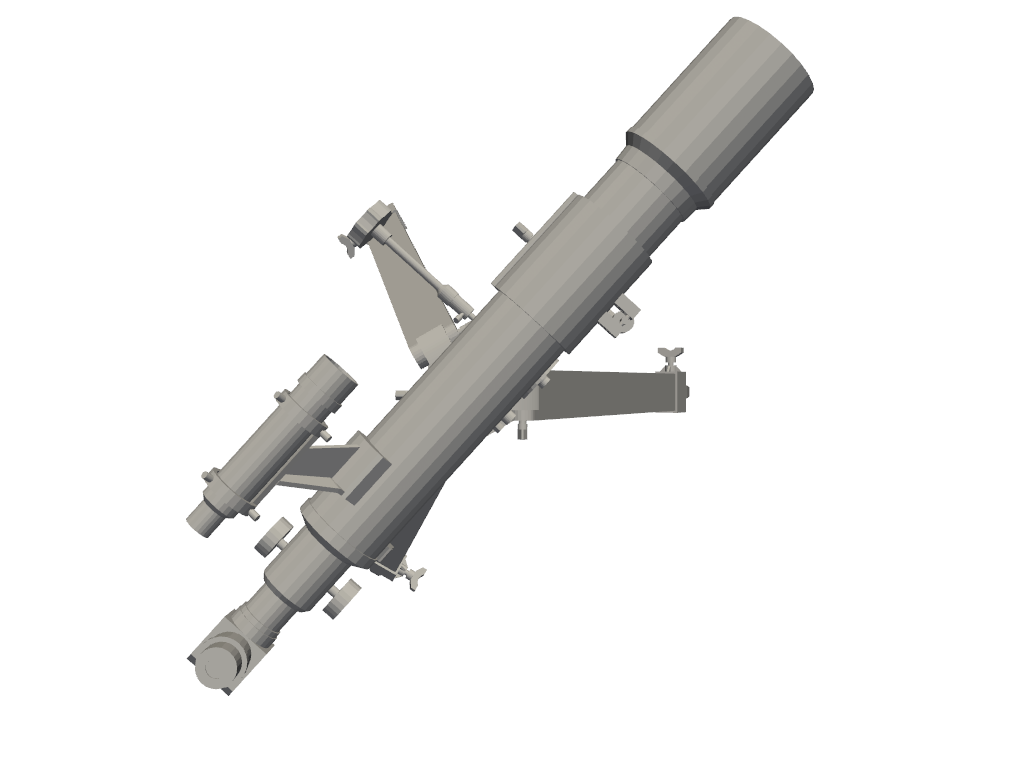

In [17]:
# 1. Load your .obj mesh
mesh = pv.read(path)  # Replace with the path to your OBJ file

# 2. Center the mesh at (0,0,0)
x_mid = (mesh.bounds[0] + mesh.bounds[1]) / 2.0
y_mid = (mesh.bounds[2] + mesh.bounds[3]) / 2.0
z_mid = (mesh.bounds[4] + mesh.bounds[5]) / 2.0
mesh.translate([-x_mid, -y_mid, -z_mid], inplace=True)

# 3. Scale the mesh so its largest dimension is about 2 units
max_dim = max(mesh.bounds[1] - mesh.bounds[0],
              mesh.bounds[3] - mesh.bounds[2],
              mesh.bounds[5] - mesh.bounds[4])
if max_dim > 0:
    scale_factor = 2.0 / max_dim
    mesh.scale(scale_factor, inplace=True)

# 4. Create a PyVista plotter in notebook mode
plotter = pv.Plotter(notebook=True)
plotter.set_background("white")   # or "black", or any color you like
plotter.add_mesh(mesh, color="lightgray")

# 5. Set a custom camera position (optional)
#    This positions the camera at (0,0,3) looking at (0,0,0) with "up" along +Y axis
plotter.camera_position = [
    (0, 0, 3),  # camera location
    (0, 0, 0),  # focal point
    (0, 1, 0)   # view "up" direction
]

# 6. Show the plot in the notebook
plotter.show(screenshot="view0.png")  


/Users/rishabhrao/Documents/VSCode/multimodal-3d-gen/env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


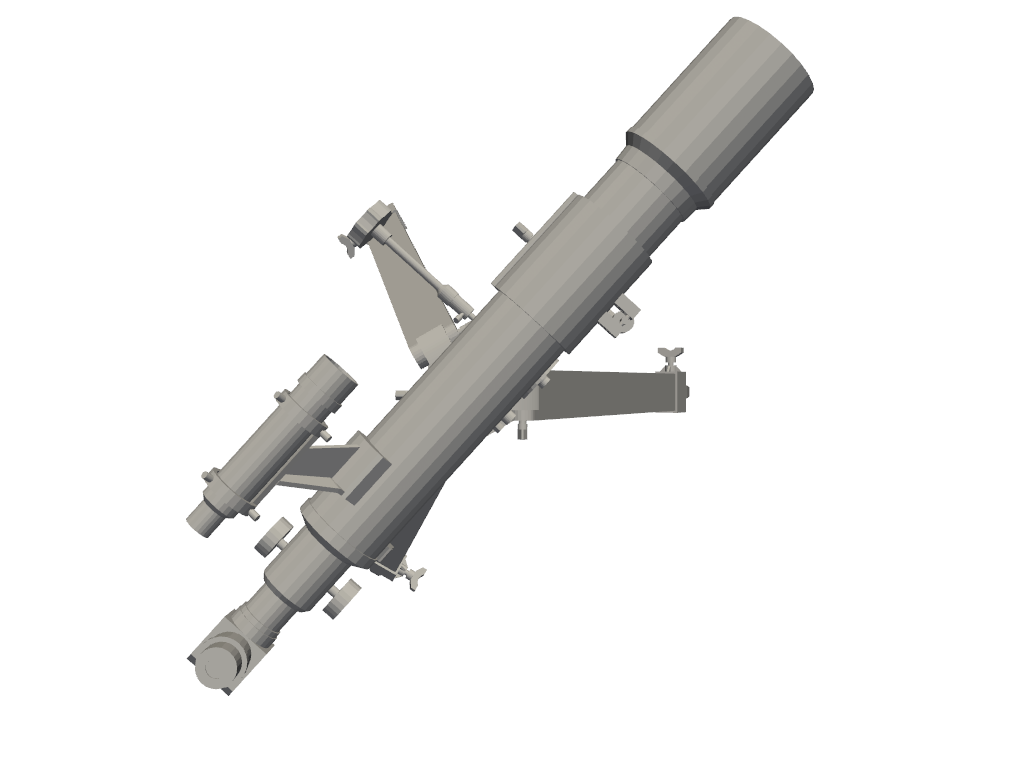

/Users/rishabhrao/Documents/VSCode/multimodal-3d-gen/env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


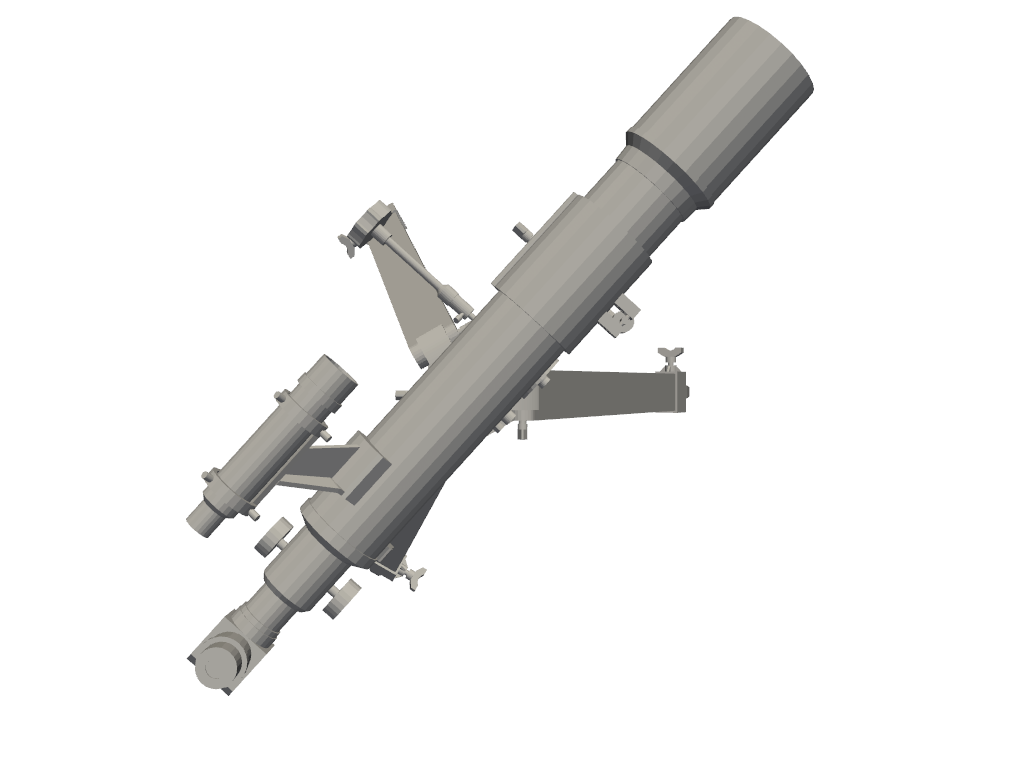

/Users/rishabhrao/Documents/VSCode/multimodal-3d-gen/env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


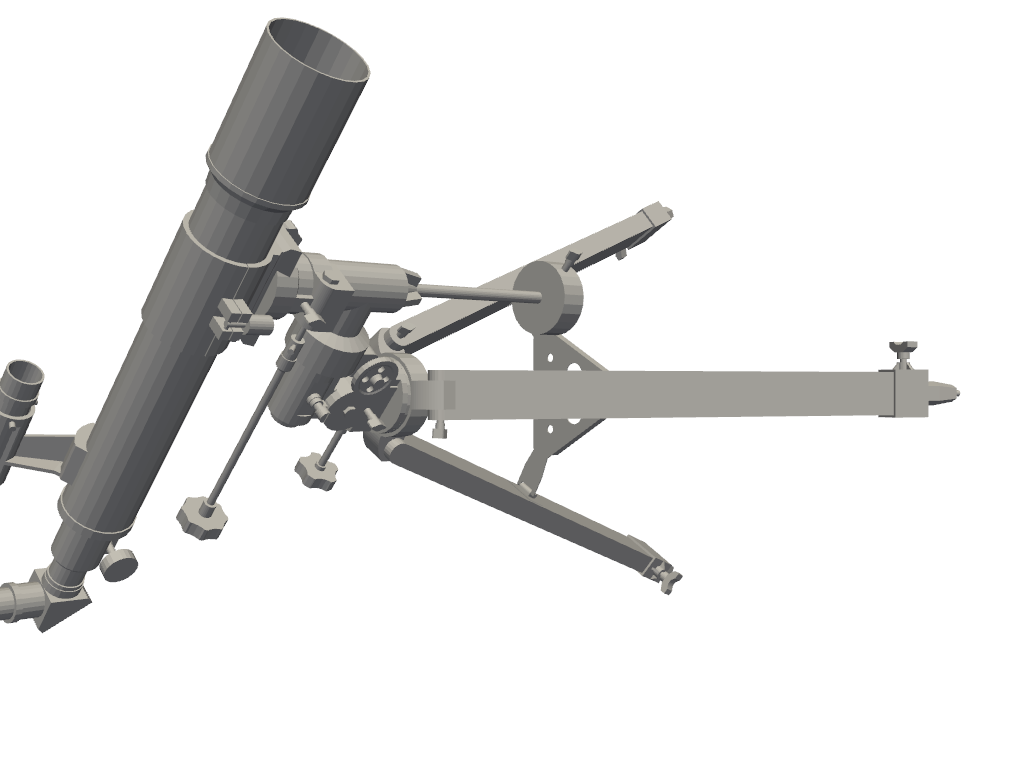

/Users/rishabhrao/Documents/VSCode/multimodal-3d-gen/env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


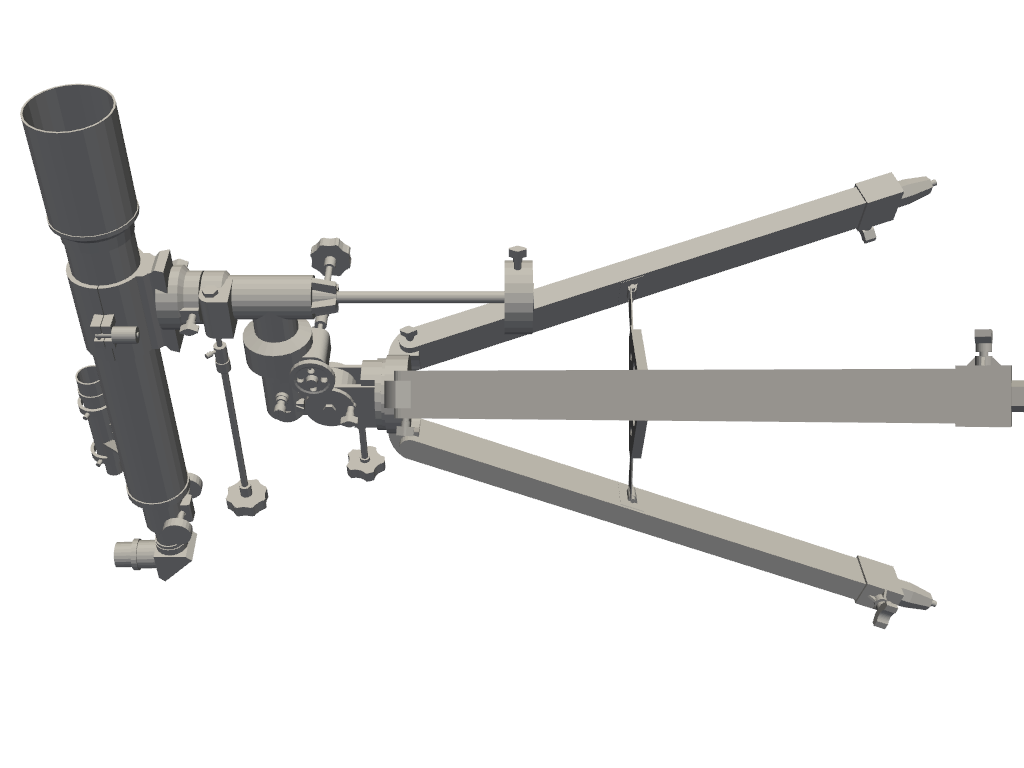

/Users/rishabhrao/Documents/VSCode/multimodal-3d-gen/env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


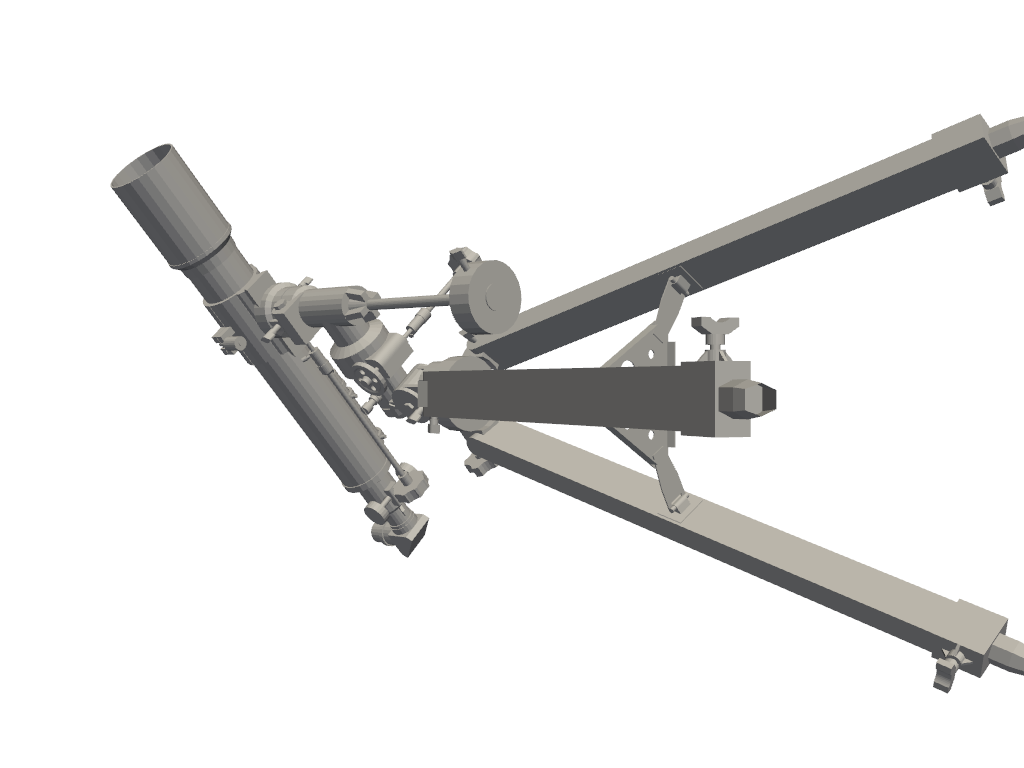

/Users/rishabhrao/Documents/VSCode/multimodal-3d-gen/env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


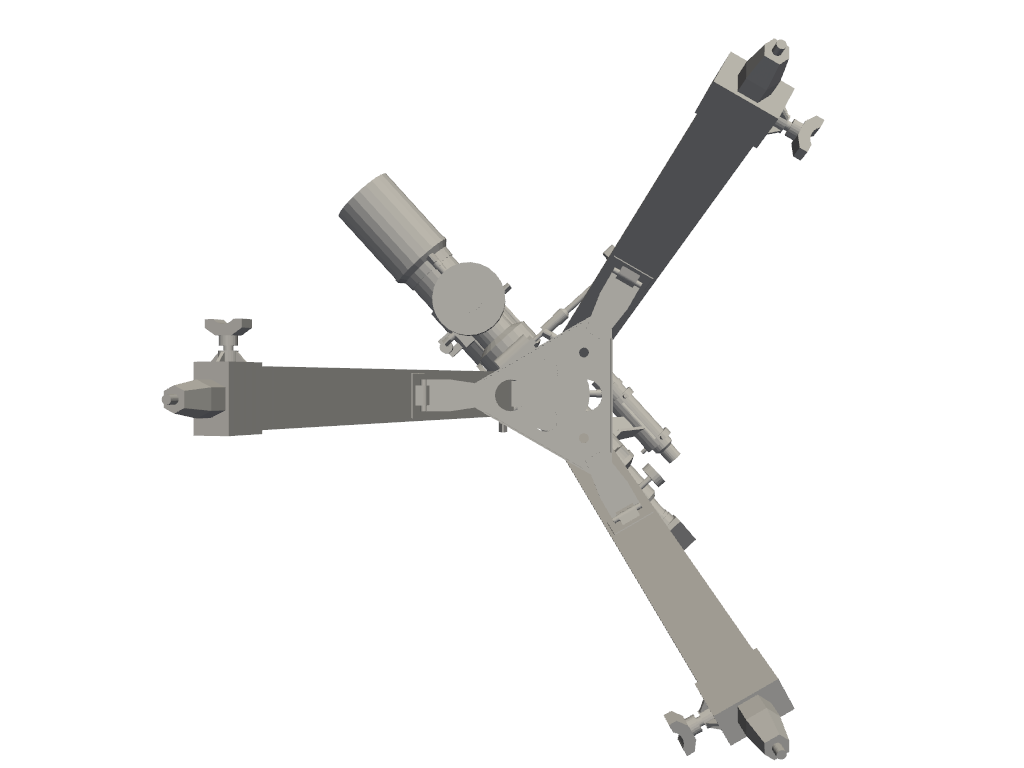

/Users/rishabhrao/Documents/VSCode/multimodal-3d-gen/env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


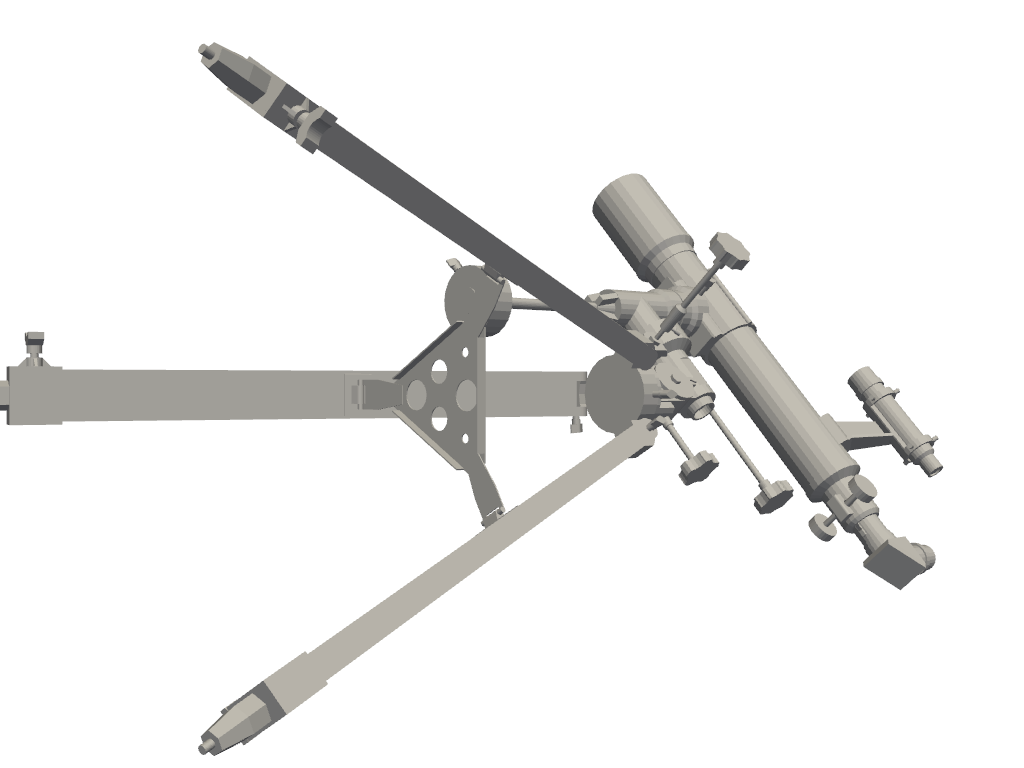

/Users/rishabhrao/Documents/VSCode/multimodal-3d-gen/env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


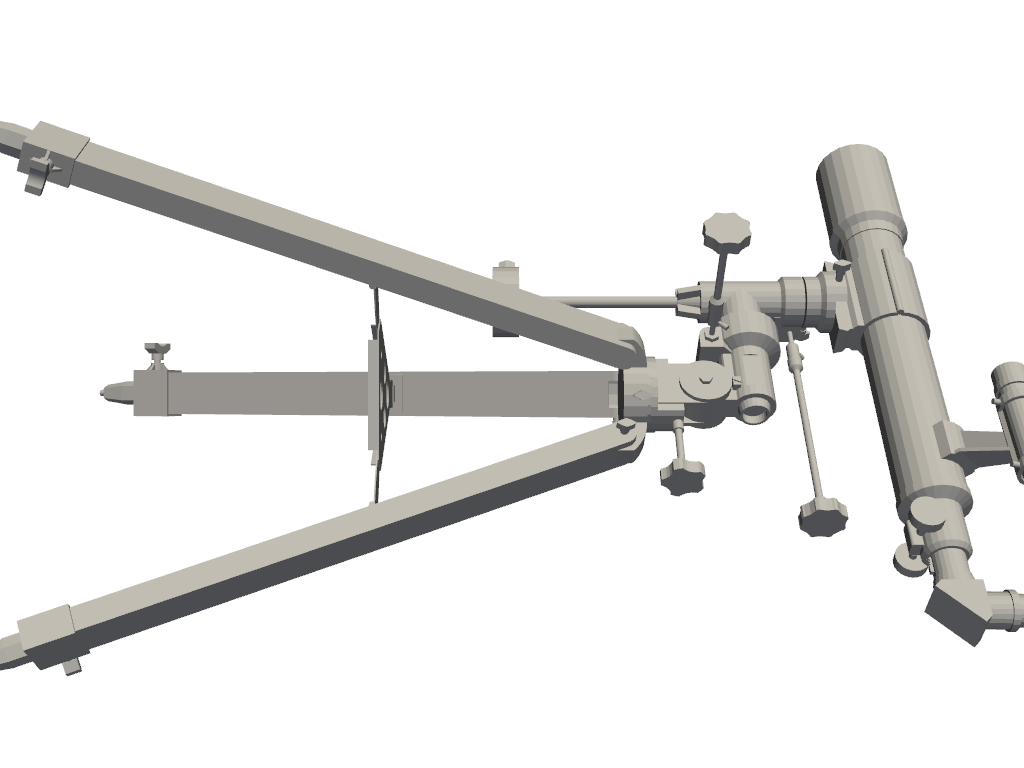

In [18]:
import math
import pyvista as pv

mesh = pv.read(path)  # your mesh path
# Center/scale the mesh as before
x_mid = (mesh.bounds[0] + mesh.bounds[1]) / 2.0
y_mid = (mesh.bounds[2] + mesh.bounds[3]) / 2.0
z_mid = (mesh.bounds[4] + mesh.bounds[5]) / 2.0
mesh.translate([-x_mid, -y_mid, -z_mid], inplace=True)
max_dim = max(mesh.bounds[1] - mesh.bounds[0],
              mesh.bounds[3] - mesh.bounds[2],
              mesh.bounds[5] - mesh.bounds[4])
if max_dim > 0:
    scale_factor = 2.0 / max_dim
    mesh.scale(scale_factor, inplace=True)

plotter = pv.Plotter(notebook=True)
plotter.add_mesh(mesh, color="lightgray")
plotter.set_background("white")

# Position the camera initially
plotter.camera_position = [
    (0, 0, 3),  # camera location
    (0, 0, 0),  # focal point
    (0, 1, 0)   # 'up' direction
]

num_views = 8
# Show the first view, saving a screenshot
plotter.show(screenshot="view0.png", auto_close=False)

for i in range(1, num_views):
    angle = 360.0 / num_views
    
    # Use the VTK method with a capital 'A'
    plotter.camera.Azimuth(angle)
    
    # Update the scene + take a screenshot
    plotter.show(screenshot=f"view{i}.png", auto_close=False)
